In [1]:
import workshop_utils.AR4_api as AR4_api
import time
import math
import pickle
from workshop_utils.camera import D435
import numpy as np
import matplotlib.pyplot as plt
from workshop_utils import *
import workshop_utils

In [9]:
##
import importlib
importlib.reload(AR4_api)
importlib.reload(workshop_utils)

<module 'workshop_utils' from 'C:\\Users\\Richard\\Desktop\\robot_demo\\robot_pick_n_place\\workshop_utils\\__init__.py'>

In [2]:
robot = AR4_api.AR4("COM3", cal_path=r'C:\Users\Richard\Desktop\robot_demo\robot_pick_n_place\robot_move\ARbot.cal')
robot.set_com_gripper("COM4")
robot.open()
myD435 = D435()
robot.grip_mm(35)


Init Start
COMMUNICATIONS STARTED WITH ARDUINO IO BOARD - See log for details
SYSTEM READY
Loaded Calibration Started
self.calibration loading complete


In [22]:
robot.close()

'NoneType' object has no attribute 'close'


In [3]:
robot.grip_mm(35)

In [5]:
robot.grip_mm(20)

In [3]:
robot.cal_robot_all()

Auto Calibration Stage 1 Successful
Auto Calibration Stage 2 Failed - see log for details
J5 CALIBRATION ERROR


In [15]:
robot.cal_robot_joint(2)
robot.cal_robot_joint(3)
robot.cal_robot_joint(1)

J2 Calibrated Successfully
J3 Calibrated Successfully
J1 Calibrated Successfully


In [16]:
robot.cal_robot_joint(4)
robot.cal_robot_joint(5)
robot.cal_robot_joint(6)

J4 Calibrated Successfully
J5 Calibrated Successfully
J6 Calibrated Successfully


In [36]:
robot.cal_robot_joint(5)

J5 Calibrated Successfully


In [38]:
robot.cal_robot_joint(4)

J4 Calibrated Successfully


In [8]:
np.set_printoptions(
    precision=6,      # Number of decimals to show
    suppress=True     # Suppress scientific notation
)

In [17]:
### Check Tool
robot2world = robot.request_T()
print(robot2world)
robot.set_tool_offsets(0,0,0.080,0,0,0)
print(robot.request_tool_T())
print(robot.request_tool_T() - robot2world)

[[ 8.02851330e-04 -1.01248879e-10  9.99999678e-01  3.22984000e-01]
 [ 2.52223192e-07  1.00000000e+00 -1.01248879e-10 -0.00000000e+00]
 [-9.99999678e-01  2.52223192e-07  8.02851330e-04  4.74799000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 8.02851330e-04 -1.01248879e-10  9.99999678e-01  4.02983974e-01]
 [ 2.52223192e-07  1.00000000e+00 -1.01248879e-10 -8.09991033e-12]
 [-9.99999678e-01  2.52223192e-07  8.02851330e-04  4.74863228e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.99999742e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.09991033e-12]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.42281064e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [18]:
robot2world = robot.request_T()
print(robot2world)

[[ 8.02851330e-04 -1.01248879e-10  9.99999678e-01  3.22984000e-01]
 [ 2.52223192e-07  1.00000000e+00 -1.01248879e-10 -0.00000000e+00]
 [-9.99999678e-01  2.52223192e-07  8.02851330e-04  4.74799000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [6]:
np.set_printoptions(
    precision=6,      # Number of decimals to show
    suppress=True     # Suppress scientific notation
)

In [12]:
# SANITY
# Check if the robot pos the converted robotT
robot.move_j(323.08, -0.0, 300, 0.018, -180, 0.018)
# robot.move_j(300, 0, 330, 180, 0, 180)
x, y, z, rx, ry ,rz, _, _, _, _ = robot.request_pos() 




print(robot.request_T())
x_, y_, z_, rz_, ry_, rx_ = se3_to_xyz_rzyx(robot.request_T())

# rz_ = (rz_ + 180.2) % 360 - 180
# ry_ = (ry_ + 180.2) % 360 - 180
# rx_ = (rx_ + 180.2) % 360 - 180
print(f"{x} {y} {z} {rz} {ry} {rx}")
print(f"{x_} {y_} {z_} {rz_} {ry} {rx}")

[[-1.        0.        0.        0.323096]
 [ 0.        1.        0.       -0.      ]
 [-0.        0.       -1.        0.300016]
 [ 0.        0.        0.        1.      ]]
323.096 -0.0 300.016 0.0 180.0 -0.0
0.323096 -0.0 0.300016 3.141592653589793 180.0 -0.0


In [13]:
temp = xyz_zyx_to_se3(0.300, 0, 0.400, 180, 0, 180)
print(temp)
temp = se3_to_xyz_rzyx(temp)
print(temp)

[[-1.   0.   0.   0.3]
 [ 0.   1.   0.   0. ]
 [ 0.   0.  -1.   0.4]
 [ 0.   0.   0.   1. ]]
(np.float64(0.3), np.float64(0.0), np.float64(0.4), np.float64(3.141592653589793), np.float64(-0.0), np.float64(3.141592653589793))


In [45]:
wrist2world = robot.request_T()
x, y, z, Rz, Ry, Rx = se3_to_xyz_rzyx(wrist2world)
print(f"{x} {y} {z} {Rz} {Ry} {Rx}")

0.300012 1.3e-05 0.330029 2.9675135139958786 -0.006544984694978895 3.1414530272496335


In [46]:
## Home_Position
robot.move_j(323.08, 0.0, 400, 0.0, 180.0, 0.0)

In [125]:
def wrap_angle_rad(angle_rad):
    """
    Wrap an angle to [-pi, pi)
    """
    return (angle_rad + np.pi) % (2*np.pi) - np.pi

def wrap_angles_rad(angles):
    """
    Wrap a list/array of angles to [-pi, pi)
    """
    return [wrap_angle_rad(a) for a in angles]

In [132]:
def se3_to_xyz_rzyx_close(T, robot, eps=1e-6):
    
    Rm = T[:3,:3]
    p = T[0:3,3]


    sy = np.sqrt(Rm[2,1]**2 + Rm[2,2]**2)
    singular = sy < eps

    if not singular:
        yaw1   = np.arctan2(Rm[1,0], Rm[0,0])
        pitch1 = np.arctan2(-Rm[2,0], sy)
        roll1  = np.arctan2(Rm[2,1], Rm[2,2])

        yaw2   = (yaw1 + np.pi) % (2*np.pi)
        pitch2 = -pitch1
        roll2  = (-roll1) % (2*np.pi)
    else:
        if Rm[2,0] <= -1 + eps:
            pitch1 = np.pi/2
        else:
            pitch1 = -np.pi/2

        yaw1 = np.arctan2(-Rm[0,1], Rm[1,1])
        roll1 = 0.0

        yaw2 = yaw1
        pitch2 = pitch1
        roll2 = 0.0

    candidate1 = [yaw1, pitch1, roll1]
    candidate2 = [yaw2, pitch2, roll2]
    return wrap_angles_rad(candidate1), wrap_angles_rad(candidate2)

In [49]:
def get_closer_euler(robot, candidate1, candidate2):

    current_euler = [float(robot.calibration['RzcurPos'])*math.pi/180, float(robot.calibration['RycurPos'])*math.pi/180, float(robot.calibration['RxcurPos'])*math.pi/180]
    R_current = R.from_euler('ZYX', current_euler).as_matrix()
    R1 = R.from_euler('ZYX', candidate1).as_matrix()
    R2 = R.from_euler('ZYX', candidate2).as_matrix()
    
    
    angle1 = np.linalg.norm(R1-R_current)
    angle2 = np.linalg.norm(R2-R_current)

    if angle1 <= angle2:
        return candidate1
    else:
        return candidate2

In [19]:
## PLOT

def plot_SE3(T, ax=None, length=0.1, colors=('r','g','b'), label=None):
    """
    Plots an SE(3) transformation as a coordinate frame.
    
    Args:
        T: 4x4 numpy array, the SE(3) matrix.
        ax: Matplotlib 3D axis.
        length: Length of the axes.
        colors: Colors for X, Y, Z axes.
        label: Optional label to mark the origin.
    """
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    origin = T[0:3, 3]
    R = T[0:3, 0:3]

    for i in range(3):
        axis = R[:, i]
        ax.quiver(
            origin[0], origin[1], origin[2],
            axis[0], axis[1], axis[2],
            color=colors[i], length=length, normalize=True
        )

    if label is not None:
        ax.text(origin[0], origin[1], origin[2], label, fontsize=10)

    return ax

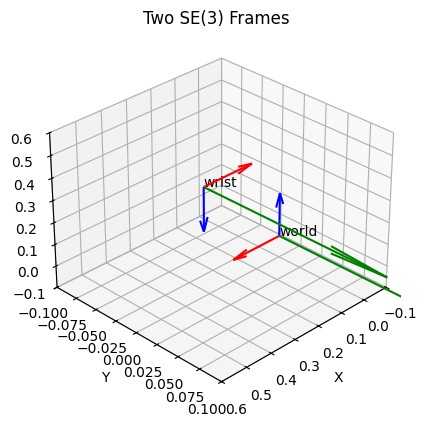

In [74]:
## PLOT WRIST_WORLD

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot both frames
T_world = np.eye(4,4)

plot_SE3(T_world, ax=ax, length=0.2, label='world')
plot_SE3(robot.request_T(), ax=ax, length=0.2, label='wrist')


# Configure axes
ax.set_xlim([-0.1,0.6])
ax.set_ylim([-0.1,0.1])
ax.set_zlim([-0.1,0.6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Two SE(3) Frames')
ax.view_init(elev=30, azim=45)
plt.show()

In [21]:
## SAMPLE_MOVE
robot.move_j(323.08, -0.0, 300, 0.018, 180, 0.018) ## ready positions
time.sleep(1)
robot.move_j(470.08, -0.0, 300, 0.018, 180, 0.018)
time.sleep(1)
robot.move_j(470.08, 150.0, 300, 0.018, 180, 0.018)
time.sleep(1)
robot.move_j(323.08, 150.0, 300, 0.018, 180, 0.018)
time.sleep(1)
robot.move_j(323.08, -0.0, 300, 0.018, 180, 0.018)

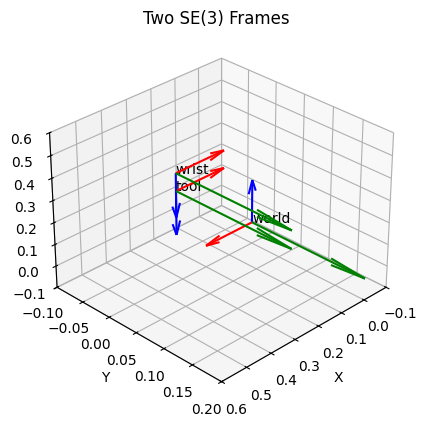

In [75]:
#PLOT WRIST TOOL WORLD
# WORKING
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot both frames
T_world = np.eye(4,4)
wrist2world = robot.request_T()
tool2world = robot.request_tool_T()


plot_SE3(T_world, ax=ax, length=0.2, label='world')
plot_SE3(wrist2world, ax=ax, length=0.2, label='wrist')
plot_SE3(tool2world, ax=ax, length=0.2, label='tool')


# Configure axes
ax.set_xlim([-0.1,0.6])
ax.set_ylim([-0.1,0.2])
ax.set_zlim([-0.1,0.6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Two SE(3) Frames')
ax.view_init(elev=30, azim=45)
plt.show()

In [ ]:
bounds_min = np.array([-100, -200, -100, -45, -20, -45])
bounds_max = np.array([200, 200, 100, 45, 20, 45])

np.random.uniform(bounds_min, bounds_max)

array([-84.93931788, -33.79141271, -18.49752487, -31.11520341,
         0.        , -15.26961881])

In [22]:
poses_new = [np.array([ 42.8342914 , 153.17736019,   9.62847773,   4.3567043 ,
         0.        , -40.64830628]), np.array([ -4.78905955, 140.89638122,  24.27309861, -19.4356603 ,
         0.        , -30.75854931]), np.array([ -3.56600095,  -3.3744436 ,  16.93965118,  24.03088282,
         0.        , -26.74424575]), np.array([-20.12369654, -14.18981927, -95.420035  , -23.7892964 ,
         0.        , -10.7164038 ]), np.array([-72.73614595,  48.33578217,  57.36548816, -19.75284923,
         0.        , -13.84280832]), np.array([  -4.50511084, -123.03568735,   66.23615953,   40.27623931,
          0.        ,   19.22771048]), np.array([ 12.83331528, 146.2119354 ,  48.54679685,  12.11384023,
         0.        , -18.26469578]), np.array([ 64.03670588, 132.44635931, -26.49971411,  14.26718208,
         0.        , -40.31363336]), np.array([ -25.47385182, -166.37161538,   -6.53377887,   39.05803743,
          0.        ,   37.55803716]), np.array([-30.95979798, -80.29246269,  52.66518693,   1.11353214,
         0.        ,  14.93168962]), np.array([-29.64655979, -88.10746762,  39.68856606,   1.37236645,
         0.        , -22.41463782]), np.array([ 60.53933279, -97.67994231,  26.42159084,  18.34398564,
         0.        ,  28.7590614 ]), np.array([  3.76059837, -66.10961289, -68.97295403, -32.94249687,
         0.        ,   4.58118104]), np.array([ 46.88607703,  27.59545538, -12.52686368, -20.64476885,
         0.        , -38.84428821]), np.array([   7.6434313 , -113.05718324,  -64.62746811,   23.84591034,
          0.        ,   23.64512025]), np.array([-75.07220205, -42.40454196,  60.54323409,   5.07058703,
         0.        , -23.57507098]), np.array([ 34.02764616, -38.47715797, -44.60794353,  26.54117645,
         0.        ,   8.69883621]), np.array([ 113.54720911, -192.92538989,   54.74875839,  -39.39832811,
          0.        ,   15.64787837]), np.array([  84.63703374, -106.27969904,   95.3736832 ,   20.717095  ,
          0.        ,    9.04859194]), np.array([  39.17954853, -182.95493051,  -59.40689619,   20.18043948,
          0.        ,   43.37744894]), np.array([ 55.47180633, 137.15227644,   9.78117207,  40.08461368,
         0.        , -28.57359685]), np.array([ 195.43034259, -111.24252352,   99.14857332,   36.76855643,
          0.        ,  -11.1649441 ]), np.array([ 58.7168719 , 134.07971912, -50.53184102,   7.64573046,
         0.        , -29.10092261]), np.array([-29.25221914, 123.99345768,  22.47718037,  11.90089958,
         0.        , -20.85262376]), np.array([-73.70476678, 170.18185298,  95.25708572,   7.27356493,
         0.        , -41.70427152]), np.array([118.70073275,  96.49965217,  87.95409378,  33.16657676,
         0.        , -30.06039722]), np.array([  64.00239166, -154.58114745,   40.49695001,  -16.0203253 ,
          0.        ,   -4.26502415]), np.array([ 58.07525361,  53.17423374,  69.87350861, -40.80464722,
         0.        , -36.33311469]), np.array([  56.21612428, -155.07418236,   83.55359446,   42.48461832,
          0.        ,   33.63643819]), np.array([ 77.07678256, 104.21689204,  77.46648389,  14.99607664,
         0.        , -43.43365239]), np.array([-57.11726478, -70.24491663,  75.9491496 , -22.65901477,
         0.        ,  20.5880914 ])]

In [23]:
## calibration vt
T_robot2base = []
T_marker2cam = []
imgs = []

poses_offset = []


# for r_pose in robot_poses:


for offset in poses_new:
    # robot.move_j(r_pose[0], r_pose[1], r_pose[2], r_pose[3], r_pose[4], r_pose[5], )

    # bounds_min = np.array([-100, -200, -100, -45, 0, -45])
    # bounds_max = np.array([200, 200, 100, 45, 0, 45])

    # offset = np.random.uniform(bounds_min, bounds_max)

    robot.move_j(400 + offset[0], -0.0 + offset[1], 300 + offset[2], 0.000 + offset[3], 180 + offset[4], 0.000 + offset[5])
    time.sleep(1)
    
    res, img = myD435.detect_aruco_T(marker_size=0.067)

    if 0 in res.keys():
        
        T_robot2base.append(robot.request_T())
        T_marker2cam.append(res[0])
        poses_offset.append(offset)
        # imgs.append(img)
        count = len(T_robot2base)
        print(f"Progress {count}")
    

    ## get the Transform of the Marker1
print("Calibration Completed")

Progress 1
Progress 2
Progress 3
Progress 4
Progress 5
Progress 6
Progress 7
Progress 8
Progress 9
Progress 10
Position Out of Reach
Progress 11
Progress 12
Progress 13
Position Out of Reach
Progress 14
Progress 15
Position Out of Reach
Progress 16
Progress 17
Progress 18
Position Out of Reach
Progress 19
Calibration Completed


In [33]:
## perform extrinsic eye on hand calibration

## parse
T_robot2base ## aka gripper to base

TR_robot2base = []
TT_robot2base = []

for Temp in T_robot2base:
    T_mat = Temp
    TR_robot2base.append(T_mat[:3,:3])
    TT_robot2base.append(T_mat[:3,3]) ## conv to meters

TR_marker2cam = []
TT_marker2cam = []


for T_mat in T_marker2cam:
    TR_marker2cam.append(T_mat['T'][:3,:3])
    TT_marker2cam.append(T_mat['T'][:3,3])   ## in meters

In [34]:
import cv2

R_res, T_res = cv2.calibrateHandEye(TR_robot2base, TT_robot2base, TR_marker2cam, TT_marker2cam)

In [35]:
import numpy as np
cam2wrist = np.eye(4,4)
cam2wrist[:3, :3] =  R_res
cam2wrist[:3,3] = T_res.T

In [36]:
print(cam2wrist)

[[ 0.27914288  0.95986856 -0.02704816 -0.04705976]
 [-0.92750327  0.27680989  0.25122492 -0.05096772]
 [ 0.2486301  -0.0450404   0.96755074  0.00299622]
 [ 0.          0.          0.          1.        ]]


In [48]:
cam2wrist = np.array([[ 0.114449,  0.992497, -0.043035, -0.026775],
 [-0.96965,   0.121026,  0.212444,  0.025386],
 [ 0.216058,  0.017415,0.976225, -0.000023],
 [ 0.,        0.  ,      0.   ,     1.  ,    ]])


In [105]:
cam2wrist = np.array([[ 0,  1, 0, 0.0325],
 [-1,   0,  0,  0.055],
 [ 0,  0, 1, 0.0],
 [ 0.,        0.  ,      0.   ,     1.  ,    ]])


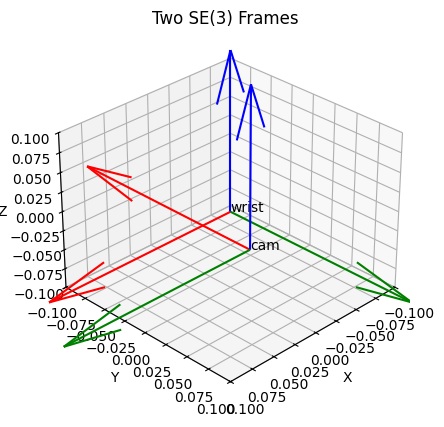

In [106]:
##PLOT CAM WRIST
## Z must align, rotated around Z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot both frames
T_world = np.eye(4,4)

plot_SE3(T_world, ax=ax, length=0.2, label='wrist')
plot_SE3(cam2wrist, ax=ax, length=0.2, label='cam')


# print(res[0]['T'])
# print(cam2gripper)

# Configure axes
ax.set_xlim([-0.1,0.1])
ax.set_ylim([-0.1,0.1])
ax.set_zlim([-0.1,0.1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Two SE(3) Frames')
ax.view_init(elev=30, azim=45)
plt.show()

[[ 1.93789186e-01  6.55120075e-05  9.81043193e-01  3.23096000e-01]
 [ 3.04403343e-05  9.99999997e-01 -7.27908979e-05  1.20000000e-05]
 [-9.81043195e-01  4.39693716e-05  1.93789183e-01  3.00016000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


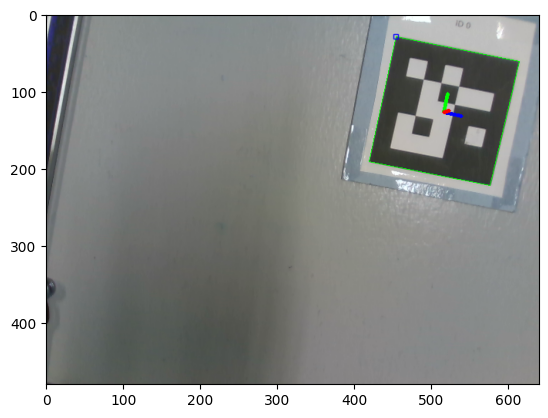

In [92]:
robot.move_j(323.08, -0.0, 300, 0.018, 180, 0.018)
res, img = myD435.detect_aruco_T(marker_size=0.067) # in meters
gripper2world = robot.request_T()
print(gripper2world)
plt.imshow(img)

In [91]:
print(res[0]['T'])
print(cam2gripper)

[[ 0.98197412  0.18900376 -0.00209831  0.08068849]
 [ 0.18856345 -0.97879847  0.07998361 -0.04426217]
 [ 0.01306338 -0.0789375  -0.99679397  0.26121481]
 [ 0.          0.          0.          1.        ]]


NameError: name 'cam2gripper' is not defined

In [23]:
def se3_to_xyz_rzyx(T): ## in mm
    """
    Converts SE(3) matrix to (x, y, z, Rz, Ry, Rx) in radians.
    
    Returns:
        tuple: (x, y, z, Rz, Ry, Rx)
    """
    R = T[0:3,0:3]
    p = T[0:3,3]

    # Compute Euler angles ZYX
    sy = -R[2,0]
    beta = np.arcsin(sy)
    cos_beta = np.cos(beta)

    if abs(cos_beta) > 1e-6:
        alpha = np.arctan2(R[2,1]/cos_beta, R[2,2]/cos_beta)
        gamma = np.arctan2(R[1,0]/cos_beta, R[0,0]/cos_beta)
    else:
        # Gimbal lock
        alpha = 0
        gamma = np.arctan2(-R[0,1], R[1,1])

    return (p[0], p[1], p[2], gamma*180/math.pi, beta*180/math.pi, alpha*180/math.pi) ## convert to mm and deg

In [104]:
robot.move_j(323.08, -0.0, 400, 0.0, 180.00, 0.00)
res, img = myD435.detect_aruco_T(marker_size=0.067) # in meters
wrist2world = robot.request_T()

marker2cam = res[0]['T']

# cam2world  = np.matmul(cam2wrist, gripper2world)
cam2world  = np.matmul(wrist2world, cam2wrist)
marker2world = np.matmul(marker2cam,cam2world)

# marker2gripper = np.matmul(cam2gripper,marker2cam)
# marker2world = np.matmul(gripper2world, marker2gripper)

x, y, z, Rz, Ry, Rx = se3_to_xyz_rzyx(cam2world)
print(f"X:{x}mm Y:{y}mm Z:{z}mm\nRZ:{Rz} RY:{Ry} RX:{Rx}")

X:0.290577mm Y:0.055mm Z:0.399993mm
RZ:-1.5707963267948966 RY:-0.0 RX:-3.141592653589793


In [71]:
res[0]['T']

array([[ 0.98146659,  0.18904427, -0.03139411,  0.08266104],
       [ 0.19001768, -0.98127186,  0.03160414, -0.02907275],
       [-0.02483158, -0.03698385, -0.9990073 ,  0.36240898],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

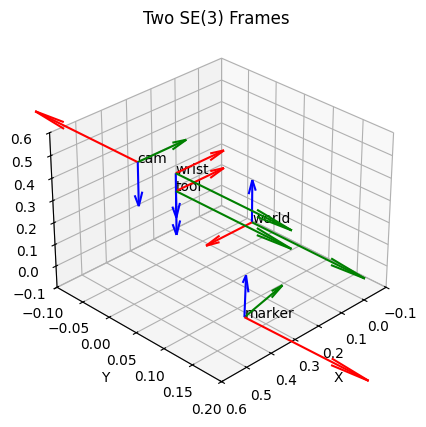

In [97]:
## PLOT4

# WORKING
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


res, img = myD435.detect_aruco_T(marker_size=0.067) # in meters
wrist2world = robot.request_T()

marker2cam = res[0]['T']

# Plot both frames
T_world = np.eye(4,4)
wrist2world = robot.request_T()
tool2world = robot.request_tool_T()

cam2world  = np.matmul(wrist2world, cam2wrist)
marker2world = np.matmul(marker2cam,cam2world)


plot_SE3(T_world, ax=ax, length=0.2, label='world')
plot_SE3(wrist2world, ax=ax, length=0.2, label='wrist')
plot_SE3(tool2world, ax=ax, length=0.2, label='tool')
plot_SE3(cam2world, ax=ax, length=0.2, label='cam')
plot_SE3(marker2world, ax=ax, length=0.2, label='marker')


# Configure axes
ax.set_xlim([-0.1,0.6])
ax.set_ylim([-0.1,0.2])
ax.set_zlim([-0.1,0.6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Two SE(3) Frames')
ax.view_init(elev=30, azim=45)
plt.show()

In [85]:
## MOVE ROBOT TO MARKER
x, y, z, Rz, Ry, Rx = se3_to_xyz_rzyx_mm(marker2world)
print(f"X:{x}mm Y:{y}mm Z:{z}mm\nRZ:{Rz} RY:{Ry} RX:{Rx}")


X:348.296685762346mm Y:88.32208769148686mm Z:-42.61531573261218mm
RZ:100.90456574433304 RY:-2.119501613573511 RX:1.4238652542810282


In [41]:
## RESET POSITION
## EE is 80mm
robot.move_j(x, y, z+ 80, 0, 180, 0)

Position Out of Reach


In [42]:
robot.move_j(323.08, -0.0, 400, 0.0, 180.00, 0.00)

In [92]:
offset = np.zeros((4,4))
offset[2,3] = 0.030
print(offset)

[[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.03]
 [0.   0.   0.   0.  ]]


In [93]:
robot.move_j_T_tool(marker2world + offset)

KeyError: 6

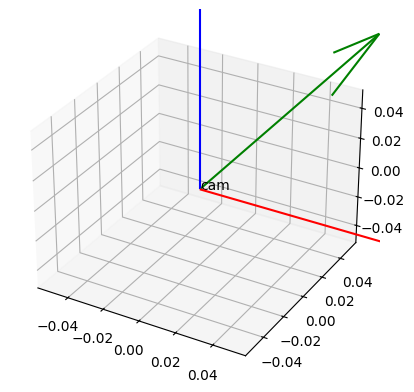

In [43]:
## The aruco marker if flipped 180 deg 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot both frames
T_world = np.eye(4,4)

plot_SE3(T_world, ax=ax, length=0.2, label='cam')
plot_SE3(res[6]['T'], ax=ax, length=0.2, label='aruco')


# Configure axes
ax.set_xlim([-0.1,0.6])
ax.set_ylim([-0.1,0.1])
ax.set_zlim([-0.1,0.6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Two SE(3) Frames')
ax.view_init(elev=30, azim=45)
plt.show()

In [34]:
### min area rect

from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# ---- Load SAM Model ----
sam_checkpoint = r"C:\Users\Richard\Desktop\robot_demo\robot_pick_n_place\robot_move\sam_vit_b_01ec64.pth"
model_type = "vit_b"
device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)

mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_batch=32,   # smaller batch for less VRAM
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92
)

depth_intrinsics = myD435.depth_intrinsics

fx, fy = depth_intrinsics.fx, depth_intrinsics.fy
cx, cy = depth_intrinsics.ppx, depth_intrinsics.ppy

print("Camera intrinsics:", fx, fy, cx, cy)


gripper2world = robot.request_T()
# marker2cam = res[0]['T']
cam2world  = np.matmul(gripper2world, cam2wrist)
camera_h = cam2world[2][3]

## learn how to perform the orientation

Camera intrinsics: 617.2272338867188 617.47802734375 321.3000183105469 241.4518280029297


In [75]:
myD435.calibration_matrix

array([[617.22723389,   0.        , 321.30001831],
       [  0.        , 617.47802734, 241.451828  ],
       [  0.        ,   0.        ,   1.        ]])

In [43]:
robot.move_j(330.08, 0, 400.00, 0, 180, 0)

In [46]:
robot.move_j(330.08, 0, 83, 0, 180, 0)

In [51]:
robot.set_tool_offsets(0,0,0.07,0,0,0)

In [55]:
def Ry(theta_rad):
    """
    Create a rotation matrix for rotation about the Y axis by angle theta (radians).
    
    Parameters:
        theta_rad: angle in radians
        
    Returns:
        (3,3) NumPy array
    """
    c = np.cos(theta_rad)
    s = np.sin(theta_rad)
    return np.array([
        [ c, 0,  s],
        [ 0, 1,  0],
        [-s, 0,  c]
    ])

In [56]:
def Ry_SE3(theta_rad):
    """
    Returns a 4x4 homogeneous transform with rotation about Y.
    """
    R3 = Ry(theta_rad)
    T = np.eye(4)
    T[:3,:3] = R3
    return T

In [ ]:
pos = robot.request_T()
print(pos)
pos[2][3] = pos[2][3] - 0.07

aruco = pos

aruco = Ry_SE3(math.pi) @ 
# print(pos)
print(aruco)

[[-0.87800804  0.          0.47864589  0.330082  ]
 [ 0.          1.          0.         -0.        ]
 [-0.47864589  0.         -0.87800804  0.082989  ]
 [ 0.          0.          0.          1.        ]]
[[-0.87800804  0.          0.47864589  0.330082  ]
 [ 0.          1.          0.         -0.        ]
 [-0.47864589  0.         -0.87800804  0.012989  ]
 [ 0.          0.          0.          1.        ]]


3D position: (np.float64(0.023149328610193726), np.float64(-0.010387188980588161), np.float64(0.25200001196935773))
3D position: (np.float64(0.004909529643430831), np.float64(0.07698894001090743), np.float64(0.2590000123018399))
3D position: (np.float64(0.004909529643430831), np.float64(0.07698894001090743), np.float64(0.2590000123018399))
3D position: (np.float64(0.019293536063606877), np.float64(0.025417559669662342), np.float64(0.2550000121118501))


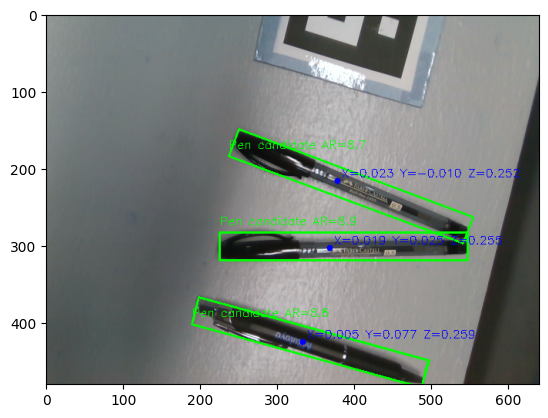

In [35]:

res = myD435.capture()

color_image = res["color"]
depth_image = res["depth_image"] * myD435.get_depth_scale()
verts = res["verts"]

rgb_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
masks = mask_generator.generate(rgb_image)

output = color_image.copy()
detected_any = False

pens = []

for mask in masks:
    m = mask['segmentation'].astype(np.uint8)*255

    # Contours
    contours, _ = cv2.findContours(m, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        continue

    temp = {}

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < 200:  # ignore tiny
            continue

        rect = cv2.minAreaRect(cnt)
        width = min(rect[1])
        height = max(rect[1])
        if width == 0:
            continue
        aspect_ratio = height / width

        # Detect elongated objects
        if aspect_ratio > 7.5:
            detected_any = True
            box = cv2.boxPoints(rect)
            box = np.int64(box)

            # Draw box
            cv2.drawContours(output, [box], 0, (0,255,0), 2)

            # Create mask ROI
            mask_roi = m > 0

            # Extract depth values within mask
            mask_depths = depth_image[mask_roi]
            valid_depths = mask_depths[(mask_depths > 0.1) & (mask_depths < 0.6)]
            if valid_depths.size == 0:
                continue

            median_depth = np.median(valid_depths)

            # Get center point
            M = cv2.moments(m)
            if M["m00"] == 0:
                continue
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            # Project to 3D
            Z = median_depth
            X = (cX - cx) * Z / fx
            Y = (cY - cy) * Z / fy

            theta_rad = np.deg2rad(rect[2])
            R_z = np.array([
                [np.cos(theta_rad), -np.sin(theta_rad), 0],
                [np.sin(theta_rad),  np.cos(theta_rad), 0],
                [0, 0, 1]
            ])

            temp["X"] = X
            temp["Y"] = Y
            temp["Z"] = Z

            center_3D = np.array([X, Y, Z])

            T = np.eye(4)
            T[:3,:3] = R_z
            T[:3,3] = center_3D

            pens.append(T)

            # Draw info
            cv2.circle(output, (cX, cY), 4, (0,0,255), -1)
            cv2.putText(output, f"Pen candidate AR={aspect_ratio:.1f}",
                        (box[0][0], box[0][1]-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
            cv2.putText(output, f"X={X:.3f} Y={Y:.3f} Z={Z:.3f}",
                        (cX+5, cY-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
            print("3D position:", (X,Y,Z))


            pens.append(temp)

if not detected_any:
    cv2.putText(output, "No elongated objects detected.",
                (10,20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255),2)

# ---- Display ----
plt.imshow(output)

In [128]:
print(pens[0])

[[ 0.99503719 -0.0995037   0.         -0.07944175]
 [ 0.0995037   0.99503719  0.          0.04534729]
 [ 0.          0.          1.          0.35200002]
 [ 0.          0.          0.          1.        ]]


In [ ]:
## perform a pick sequence

cam2world = np.matmul(robot.request_T(),cam2wrists)


In [28]:
robot.grip_mm(30)

In [ ]:
## perform a pick sequence where place is controlled by a marker
pens[0]

pen2world = cam2world @ pens[0]


project2xy = np.array([[1,1,0,1],
                        [1,1,0,1],
                        [0,0,1,1],
                        [0,0,0,1]
                    ])

projected_pen = 

In [35]:
pen2world

array([[-0.99731645,  0.07088875,  0.01829439,  0.20441168],
       [ 0.07318481,  0.95860032,  0.27518976, -0.28279367],
       [ 0.00197085,  0.27579014, -0.96121585, -0.11548735],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [ ]:
# grip_pos = (np.multiply(project2xy,pen_location))


In [32]:
robot.move_j(pen2world[0][3]*1000, pen2world[1][3]*1000, 200, 0, 180 ,0)

In [133]:
robot.move_j(pen2world[0][3]*1000, pen2world[1][3]*1000, 85, 0, 180 ,0)

In [107]:
robot.grip_mm(5)

In [106]:
robot.move_j(pen2world[0][3]*1000, pen2world[1][3]*1000, 200, 0, 180 ,0)